In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load MNIST dataset into training and test sets.

In [0]:
x_train = x_train.reshape(60000,784) # data reshape before normalization
y_train = keras.utils.to_categorical(y_train, 10) # convert to categorical data instead of numerical data


In [0]:
x_test = x_test.reshape(10000,784) # data reshape before normalization
y_test = keras.utils.to_categorical(y_test,10) # convert to categorical data instead of numerical data

In [0]:
x_train = x_train.astype('float32') # Define as float32 type
x_test = x_test.astype('float32') # Define as float32 type
x_train /= 255 # normalization
x_test /= 255 # normalization

In [6]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 784) train samples
(10000, 784) test samples


In [7]:
model = Sequential()
model.add(Dense(10, input_dim= 784, activation= 'softmax' )) # add softmax activation to inut layer

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # compiling model with optimizer standard gradient descent and loss function of categorical cross entropy method.
train = model.fit(x_train, y_train, batch_size = 128,epochs = 20, verbose = 1, validation_data = (x_test, y_test)) # Training model with training data
score = model.evaluate(x_test, y_test, verbose = 0) # evaluating the loss in the predicted values.

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 28us/step - loss: 1.2840 - acc: 0.6949 - val_loss: 0.8112 - val_acc: 0.8379
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.7136 - acc: 0.8423 - val_loss: 0.6067 - val_acc: 0.8645
Epoch 3/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5851 - acc: 0.8605 - val_loss: 0.5253 - val_acc: 0.8737
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5242 - acc: 0.8687 - val_loss: 0.4800 - val_acc: 0.8808
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.4870 - acc: 0.8749 - val_loss: 0.4504 - val_acc: 0.8859
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.4615 - acc: 0.8799 - val_loss: 0.4296 - val_acc: 0.8908
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0

In [10]:
print(train.history)
print('test score:', score[0])
print('test accuracy:', score[1]*100,'%')

{'val_loss': [0.8112494287490845, 0.6066961763858795, 0.5252962179660797, 0.4799949333190918, 0.4504144729137421, 0.4296131407737732, 0.41381105666160584, 0.400692005109787, 0.39035383200645446, 0.3820487512588501, 0.37429180793762207, 0.36824473090171816, 0.36274192357063295, 0.35749233717918394, 0.3530300505399704, 0.3492775650024414, 0.345467910861969, 0.3423562077999115, 0.33935503282546997, 0.3365019945383072], 'val_acc': [0.8379, 0.8645, 0.8737, 0.8808, 0.8859, 0.8908, 0.8928, 0.8952, 0.8974, 0.8995, 0.9012, 0.9021, 0.9024, 0.9031, 0.9045, 0.905, 0.9056, 0.9071, 0.9073, 0.9081], 'loss': [1.2839972737312317, 0.7135890680631002, 0.585125565179189, 0.5241560609976451, 0.4870329933484395, 0.4615422407309214, 0.4426759708404541, 0.42793772219022114, 0.41604322636922203, 0.40613897142410277, 0.397761375284195, 0.39049280028343203, 0.3842071048895518, 0.37858219319979347, 0.3735609695116679, 0.36908728817303976, 0.3649784547328949, 0.3612607028802236, 0.3578808468182882, 0.3546772106965

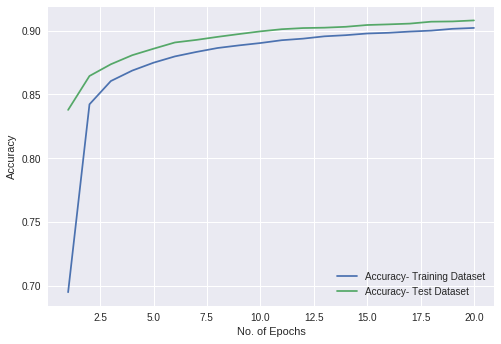

In [17]:
plt.plot(range(1, 21), train.history['acc'], range(1, 21), train.history['val_acc'])
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend(('Accuracy- Training Dataset', 'Accuracy- Test Dataset'))
plt.show()